# **Importing necessary libraries**

In [1]:
import warnings

# Filter out deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
!pip install hvplot
import holoviews as hv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00


# **Process of creating the Summary dataframe**

## **compiling the csv files**

In [4]:
import pandas as pd

# Define URLs for the CSV files
urls = {
    'visitors': f'https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348699/CinemaWeeklyVisitors.csv',
    'age': f'https://tinyurl.com/ChrisCoDV/001348699/CinemaAge.csv',
    'capacity': f'https://tinyurl.com/ChrisCoDV/001348699/CinemaCapacity.csv',
    'marketing': f'https://tinyurl.com/ChrisCoDV/001348699/CinemaMarketing.csv',
    'overheads': f'https://tinyurl.com/ChrisCoDV/001348699/CinemaOverheads.csv',
    'spend': f'https://tinyurl.com/ChrisCoDV/001348699/CinemaSpend.csv'
}

# Load CSV files into DataFrames
dfs = {}
for name, url in urls.items():
    dfs[name] = pd.read_csv(url)

# Merge cinema summary data into one DataFrame
csv_df = dfs['age']
for name in ['capacity', 'marketing', 'overheads', 'spend']:
    csv_df = csv_df.merge(dfs[name], on='Id')

# Compile weekly visitor data into a separate DataFrame
visitor_df = dfs['visitors']

csv_df


,Id,Avg age (yrs),Seating capacity,Marketing (£000s),Overheads (£000s),Avg spend (£)
0,BQV,37,30,1,28,12
1,RPQ,40,193,5,23,14
2,UVQ,39,169,12,96,12
3,TJN,31,146,12,92,18
4,TPY,36,137,5,31,22
5,VPG,38,252,32,94,20
6,WVA,43,415,25,87,22
7,ZQL,38,30,2,45,14
8,WKL,35,93,2,50,14
9,XQE,45,33,3,20,20


## **Processing the time series data**

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
data1 = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348699/CinemaWeeklyVisitors.csv',
                   index_col=0)

data1


,BQV,RPQ,UVQ,TJN,TPY,VPG,WVA,ZQL,WKL,XQE,...,SDT,WQW,CWN,UDD,BWF,AKA,YCI,XWO,CCX,VJV
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0,293,376,520,456,1226,856,111,126,164,...,0,188,0,357,151,0,132,142,0,973
2019-01-08,0,313,431,391,479,901,823,132,118,127,...,0,163,0,369,180,0,133,151,0,990
2019-01-15,0,285,282,401,472,1058,850,111,117,157,...,0,190,0,360,189,0,135,183,0,917
2019-01-22,0,281,518,507,480,1058,753,113,116,108,...,0,203,0,361,162,0,138,141,0,972
2019-01-29,0,296,337,443,440,813,832,84,120,131,...,0,171,0,365,200,0,132,186,0,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-29,82,290,573,446,505,923,860,0,138,158,...,296,213,251,403,0,135,142,174,205,1013
2022-12-06,135,305,342,382,477,866,871,0,130,132,...,169,182,273,390,0,121,147,169,323,1074
2022-12-13,183,284,386,385,386,994,842,0,129,127,...,271,201,255,397,0,127,144,196,234,1011


In [9]:
import pandas as pd

# Assuming 'data1' is your existing DataFrame with the provided data
# Reset the index to bring the 'Date' column back to being a regular column
data1.reset_index(inplace=True)

# Rename the index column to 'Id'
data1.rename(columns={'index': 'Id'}, inplace=True)

# Now 'Date' is a regular column, you can manipulate it further if needed

# Display the DataFrame
data1

,Date,BQV,RPQ,UVQ,TJN,TPY,VPG,WVA,ZQL,WKL,...,SDT,WQW,CWN,UDD,BWF,AKA,YCI,XWO,CCX,VJV
0,2019-01-01,0,293,376,520,456,1226,856,111,126,...,0,188,0,357,151,0,132,142,0,973
1,2019-01-08,0,313,431,391,479,901,823,132,118,...,0,163,0,369,180,0,133,151,0,990
2,2019-01-15,0,285,282,401,472,1058,850,111,117,...,0,190,0,360,189,0,135,183,0,917
3,2019-01-22,0,281,518,507,480,1058,753,113,116,...,0,203,0,361,162,0,138,141,0,972
4,2019-01-29,0,296,337,443,440,813,832,84,120,...,0,171,0,365,200,0,132,186,0,959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2022-11-29,82,290,573,446,505,923,860,0,138,...,296,213,251,403,0,135,142,174,205,1013
205,2022-12-06,135,305,342,382,477,866,871,0,130,...,169,182,273,390,0,121,147,169,323,1074
206,2022-12-13,183,284,386,385,386,994,842,0,129,...,271,201,255,397,0,127,144,196,234,1011
207,2022-12-20,158,274,518,570,424,1014,872,0,127,...,298,206,304,386,0,137,137,212,267,1046


## **Creating the ID to Total Weekly Visitors dataframe**

In [10]:
import pandas as pd

# Load the DataFrame from the CSV file
df2 = pd.read_csv('https://raw.githubusercontent.com/ChrisWalshaw/DataViz/master/Data/001348699/CinemaWeeklyVisitors.csv')
# Replace 'path_to_your_csv_file.csv' with the actual file path

numeric_columns = df2.select_dtypes(include='number')

# Sum up the weekly visitors for each cinema (row)
total_weekly_visitors_data = numeric_columns.sum(axis=0).reset_index()
total_weekly_visitors_data.columns = ['Id', 'Total Weekly Visits']
total_weekly_visitors_data

,Id,Total Weekly Visits
0,BQV,12325
1,RPQ,59242
2,UVQ,83757
3,TJN,93526
4,TPY,95554
5,VPG,200540
6,WVA,174649
7,ZQL,13279
8,WKL,25917
9,XQE,31428


# **SUMMARY DATAFRAME**

In [11]:
summary_df = csv_df.merge(total_weekly_visitors_data, left_on='Id', right_on='Id', how='left')


summary_df_sorted = summary_df.sort_values(by='Avg age (yrs)', ascending=True)

# Print the first few rows of the resulting DataFrame
# merged_df_sorted

summary_df

,Id,Avg age (yrs),Seating capacity,Marketing (£000s),Overheads (£000s),Avg spend (£),Total Weekly Visits
0,BQV,37,30,1,28,12,12325
1,RPQ,40,193,5,23,14,59242
2,UVQ,39,169,12,96,12,83757
3,TJN,31,146,12,92,18,93526
4,TPY,36,137,5,31,22,95554
5,VPG,38,252,32,94,20,200540
6,WVA,43,415,25,87,22,174649
7,ZQL,38,30,2,45,14,13279
8,WKL,35,93,2,50,14,25917
9,XQE,45,33,3,20,20,31428


In [13]:
import pandas as pd

# Assuming your DataFrame is named 'data1'
# Melt the DataFrame to convert columns into rows
melted_data = data1.melt(id_vars=['Date'], var_name='Id', value_name='Value')

# Display the transformed DataFrame
melted_data

,Date,Id,Value
0,2019-01-01,BQV,0
1,2019-01-08,BQV,0
2,2019-01-15,BQV,0
3,2019-01-22,BQV,0
4,2019-01-29,BQV,0
...,...,...,...
6265,2022-11-29,VJV,1013
6266,2022-12-06,VJV,1074
6267,2022-12-13,VJV,1011
6268,2022-12-20,VJV,1046


# **CUSTOMER DATAFRAME**

In [14]:
# Merge melted_data with merged_df on the 'Id' column
customer_data = pd.merge(summary_df, melted_data, on='Id')

# Rearrange the columns
customer_data = customer_data[['Id', 'Date', 'Value', 'Total Weekly Visits', 'Avg age (yrs)', 'Seating capacity', 'Marketing (£000s)', 'Overheads (£000s)', 'Avg spend (£)']]

# Renaming column names
customer_data.rename(columns={'Value': 'Weekly Visits'}, inplace=True)
customer_data.rename(columns={'Total Weekly Visits': 'Total Customer Visits'}, inplace=True)


# Display the updated DataFrame
customer_data

,Id,Date,Weekly Visits,Total Customer Visits,Avg age (yrs),Seating capacity,Marketing (£000s),Overheads (£000s),Avg spend (£)
0,BQV,2019-01-01,0,12325,37,30,1,28,12
1,BQV,2019-01-08,0,12325,37,30,1,28,12
2,BQV,2019-01-15,0,12325,37,30,1,28,12
3,BQV,2019-01-22,0,12325,37,30,1,28,12
4,BQV,2019-01-29,0,12325,37,30,1,28,12
...,...,...,...,...,...,...,...,...,...
6265,VJV,2022-11-29,1013,207366,33,570,24,57,17
6266,VJV,2022-12-06,1074,207366,33,570,24,57,17
6267,VJV,2022-12-13,1011,207366,33,570,24,57,17
6268,VJV,2022-12-20,1046,207366,33,570,24,57,17


# **Visualisation 1: A Bar Chart illustrating the Total Number of Customer Visits per Cinema spanning the years from 2019 to 2022.**

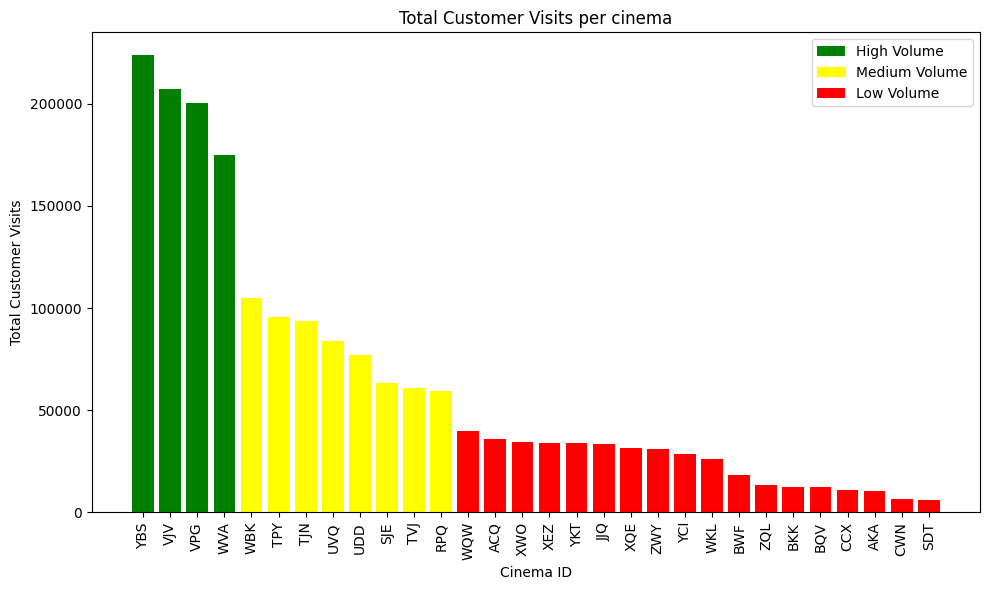

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sorting the DataFrame by 'Total Weekly Visits' in descending order
weekly_visits = summary_df.sort_values(by='Total Weekly Visits', ascending=False).reset_index(drop=True)

# Defining colors based on visit volume
colors = ['green'] * 4 + ['yellow'] * 8 + ['red'] * (len(summary_df) - 12)

# Creating the bar chart using the sorted DataFrame
plt.figure(figsize=(10, 6))
bars = plt.bar(weekly_visits['Id'], weekly_visits['Total Weekly Visits'], color=colors)

# Adding title and labels
plt.title('Total Customer Visits per cinema', fontsize=12)
plt.xlabel('Cinema ID')
plt.ylabel('Total Customer Visits')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Adding legend for colors
plt.legend(handles=[bars[0], bars[6], bars[-1]], labels=['High Volume', 'Medium Volume', 'Low Volume'], loc='upper right')

# Displaying the plot
plt.tight_layout()
plt.show()

# **Visualisation 2: Four Radar Charts illustrating the Comparison of High Volume Cinemas based on the Total Weekly Visits, Average age, Seating capacity, Marketing, and Overheads Costs.**

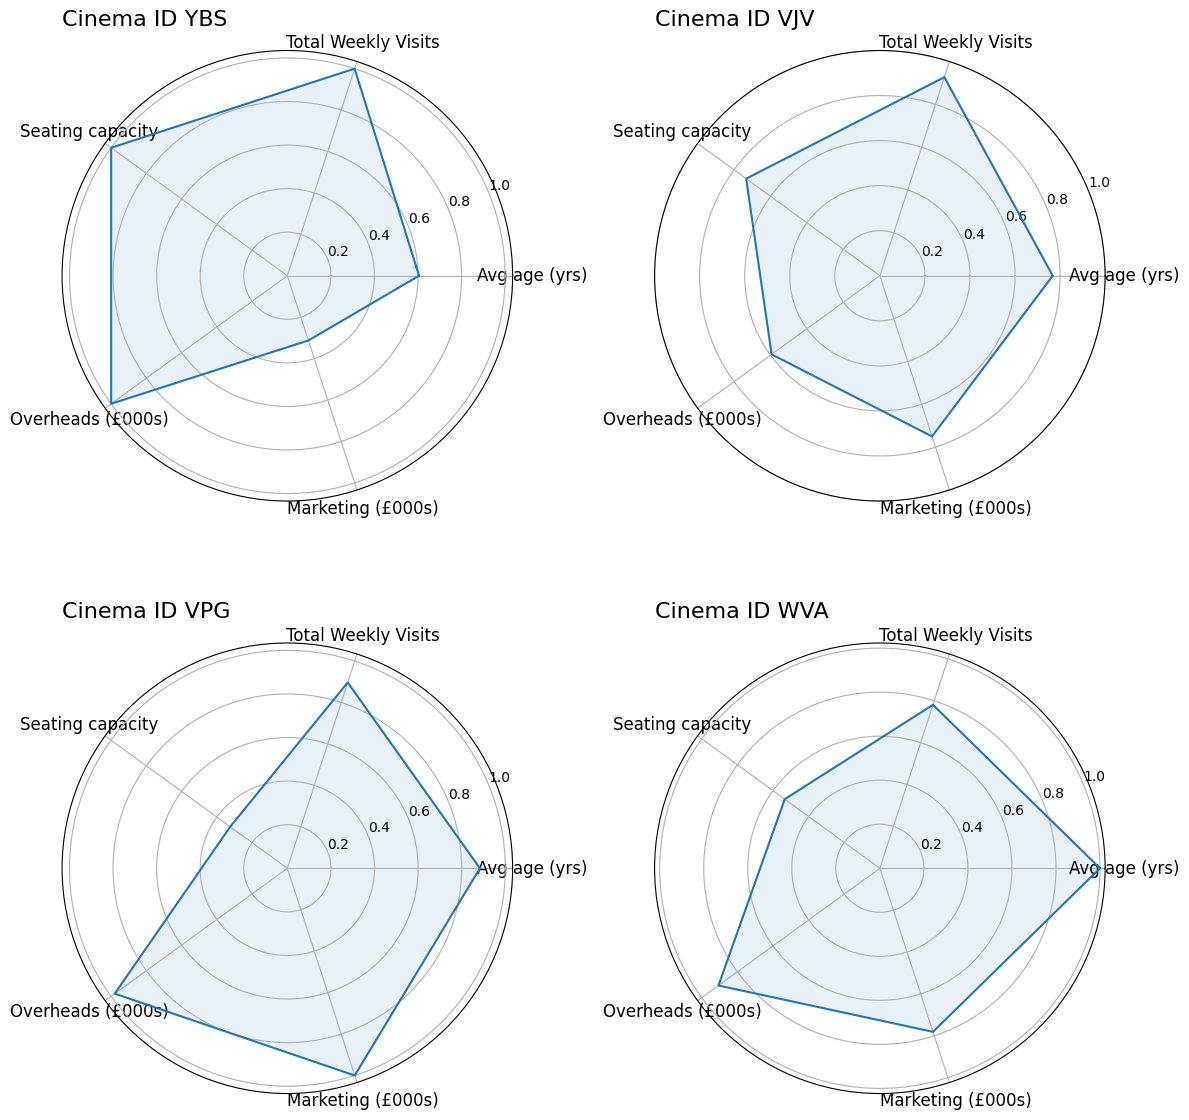

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

selected_categories = ['YBS', 'VJV', 'VPG', 'WVA']
attributes = ['Avg age (yrs)', 'Total Weekly Visits', 'Seating capacity' ,  'Overheads (£000s)', 'Marketing (£000s)',]

# Selecting data for the selected categories
selected_data = summary_df[summary_df['Id'].isin(selected_categories)]

# Setting the 'Id' column as index for the selected data
selected_data.set_index('Id', inplace=True)

# Normalizing the data
normalized_data = selected_data[attributes].div(selected_data[attributes].max())

# Plotting radar charts for each category
n_plots = len(selected_categories)
n_plots_per_row = 2
n_rows = int(np.ceil(n_plots / n_plots_per_row))

fig, axs = plt.subplots(nrows=n_rows, ncols=n_plots_per_row, figsize=(12, 6 * n_rows), subplot_kw=dict(polar=True))
axs = axs.flatten()

for i, category in enumerate(selected_categories):
    ax = axs[i]
    values = normalized_data.loc[category].values.flatten().tolist()
    values += values[:1]  # To close the loop
    angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
    angles += angles[:1]  # To close the loop

    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=12)  # Increased fontsize here
    ax.set_title(f'Cinema ID {category}', fontsize=16, loc='left')

# Hide unused subplots
for i in range(n_plots, n_rows * n_plots_per_row):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


# **Visualisation 3: A Seasonal Decomposition Analysis of Weekly Visits for Cinema 'YBS' for 2022.**

<ipython-input-18-058aa805e222>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Date'] = pd.to_datetime(selected_data['Date'])


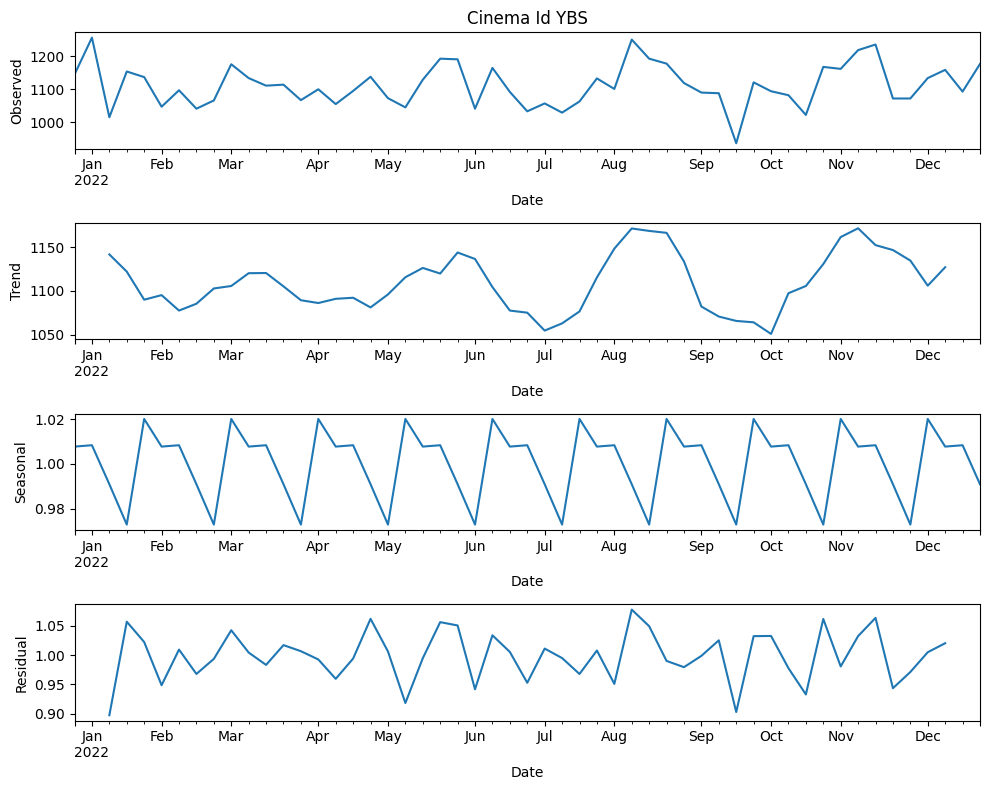

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming customer_data2 is your DataFrame
# Selecting data for Id 'YBS' and date range from 2019-01-01 to 2019-02-26
selected_data = customer_data[(customer_data['Id'] == 'YBS') &
                                (customer_data['Date'] >= '2021-12-28') &
                                (customer_data['Date'] <= '2022-12-27')]

# Converting 'Date' column to datetime type if it's not already
selected_data['Date'] = pd.to_datetime(selected_data['Date'])

# Setting 'Date' column as index
selected_data.set_index('Date', inplace=True)

# Selecting the column 'Weekly Visits' for analysis
data_to_analyze = selected_data['Weekly Visits']

# Perform seasonal decomposition with period 5
result = seasonal_decompose(data_to_analyze, model='multiplicative', period=5)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')
axes[0].set_xlabel('Date')
axes[0].set_title('Cinema Id YBS')

result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')
axes[1].set_xlabel('Date')

result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')
axes[2].set_xlabel('Date')

result.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()



# **Visualisation 4: Radar Charts illustrating the comparison between High and Medium Volume Cinemas between the categories.**

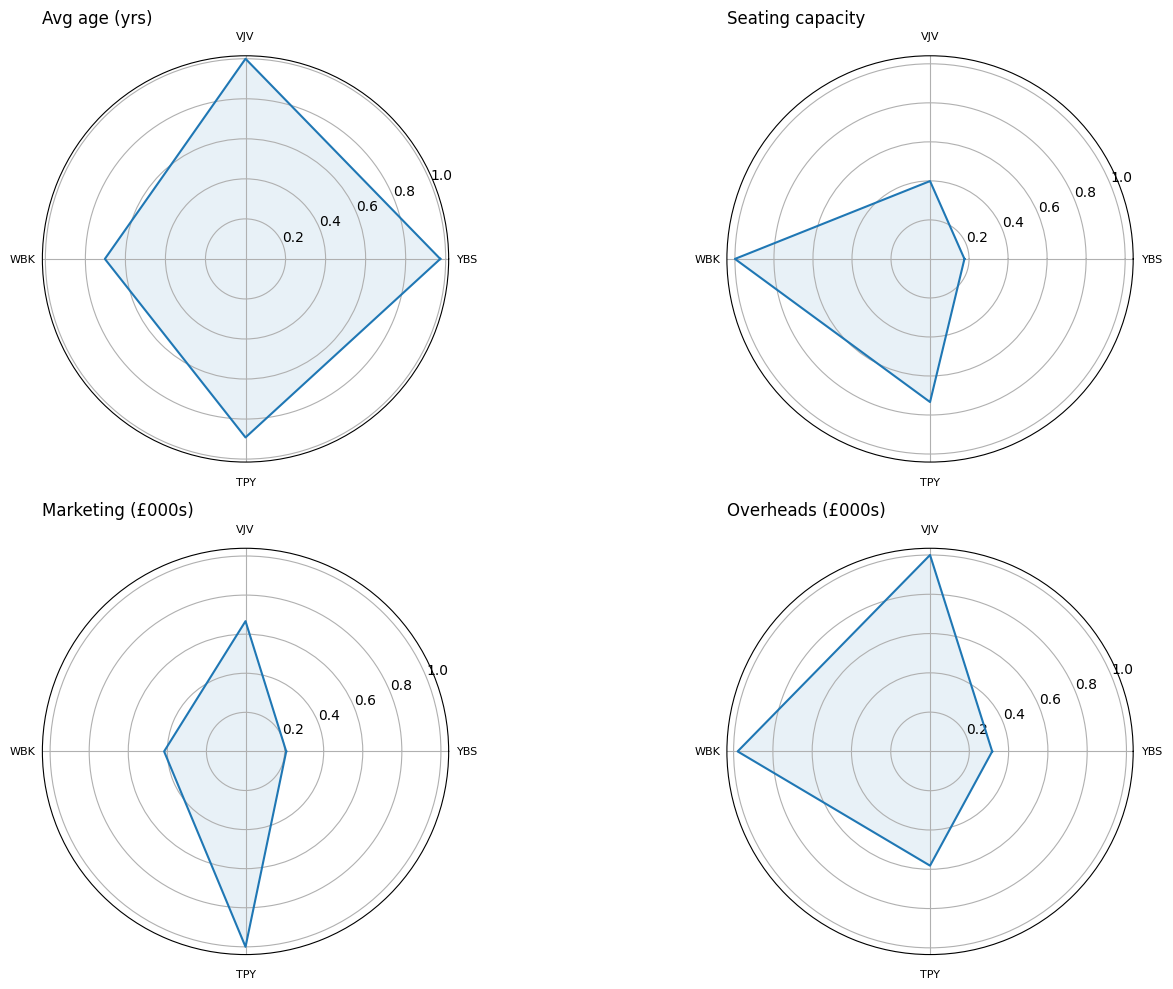

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming merged_df is already defined with the provided data

selected_categories = ['YBS', 'VJV', 'WBK', 'TPY']
attributes = ['Avg age (yrs)', 'Seating capacity', 'Marketing (£000s)', 'Overheads (£000s)']

# Selecting data for the selected categories
selected_data = summary_df[summary_df['Id'].isin(selected_categories)]

# Setting the 'Id' column as index for the selected data
selected_data.set_index('Id', inplace=True)

# Normalizing the data
normalized_data = selected_data[attributes].div(selected_data[attributes].max())

# Plotting radar chart for each attribute
n_attributes = len(attributes)
n_categories = len(selected_categories)
n_plots_per_row = 2
n_rows = int(np.ceil(n_attributes / n_plots_per_row))

fig, axs = plt.subplots(nrows=n_rows, ncols=n_plots_per_row, figsize=(15, 5 * n_rows), subplot_kw=dict(polar=True))
axs = axs.flatten()

for i, attribute in enumerate(attributes):
    ax = axs[i]
    values = normalized_data[attribute].tolist()
    values += values[:1]  # To close the loop
    angles = np.linspace(0, 2 * np.pi, n_categories, endpoint=False).tolist()
    angles += angles[:1]  # To close the loop

    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(selected_categories, fontsize=8)
    ax.set_title(attribute, fontsize=12, loc='left')

# Hide unused subplots
for i in range(n_attributes, n_rows * n_plots_per_row):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


# **Visualisation 5: An Interactive Line Graph illustrating the Weekly Visits over a 28-day period for Medium and Low Volume Cinemas.**

In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Define the selected IDs
selected_ids = ['WBK', 'TPY', 'UVQ', 'WQW', 'ACQ', 'XWO']

# Filter data for selected IDs
filtered_data = customer_data2[customer_data2['Id'].isin(selected_ids)]

# Set the start and end date
start_date = '2021-06-01'
end_date = '2021-06-29'

# Filter data based on the date range
filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & (filtered_data['Date'] <= end_date)]

# Create traces for each selected ID
traces = []
for id in selected_ids:
    id_data = filtered_data[filtered_data['Id'] == id]
    trace = go.Scatter(x=id_data['Date'], y=id_data['Weekly Visits'], mode='lines', name=id)
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Weekly Visits over a 28 day period for High and Medium Volume Cinemas',
    xaxis=dict(title='Date', tickfont=dict(size=14)),  # Adjust font size of x-axis ticks
    yaxis=dict(title='Weekly Visits'),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()


# **Visualisation 6: An Interactive Heatmap Correlation displaying metric comparisons among Medium Volume Cinemas.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Filter out the 'Id' column for the specified cinemas
cinemas = ['WBK', 'TPY', 'TJN', 'UVQ', 'UDD']
filtered_data = summary_df[summary_df['Id'].isin(cinemas)].drop(columns=['Id'])

# Create a correlation matrix
corr = filtered_data.corr()

# Create a heatmap using Plotly with the 'RdBu' colorscale
heatmap = go.Heatmap(z=corr.values,
                     x=corr.columns,
                     y=corr.index,
                     colorscale='RdBu',
                     zmin=-1.0,
                     zmax=1.0)

layout = go.Layout(title='Medium Volume Cinema Comparisons',
                   xaxis=dict(title='Categories'),
                   yaxis=dict(title='Categories'))

fig = go.Figure(data=[heatmap], layout=layout)

fig.show()


# **Visualisation 7: Line Plot Explorations of Weekly Visits for all Low Volume Cinemas within the first two years.**

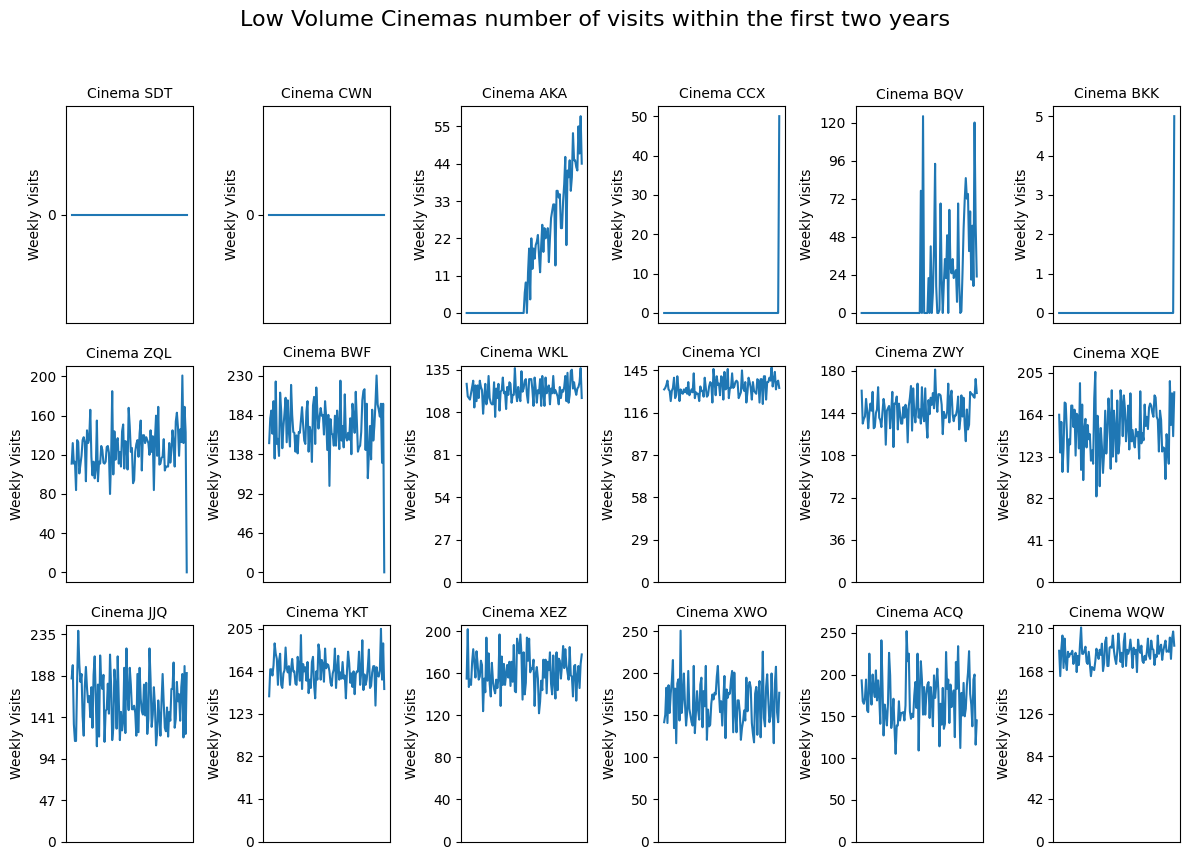

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for selected IDs
selected_ids = ['SDT', 'CWN', 'AKA', 'CCX', 'BQV', 'BKK', 'ZQL', 'BWF', 'WKL', 'YCI', 'ZWY', 'XQE', 'JJQ', 'YKT', 'XEZ', 'XWO', 'ACQ', 'WQW']
filtered_df = customer_data[customer_data['Id'].isin(selected_ids)].copy()

# Convert 'Date' column to datetime format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Filter the DataFrame for the specified date range
start_date = '2019-01-01'
end_date = '2021-01-05'
filtered_df = filtered_df[(filtered_df['Date'] >= start_date) & (filtered_df['Date'] <= end_date)]

# Calculate number of rows and columns for subplots
num_ids = len(selected_ids)
num_cols = 6
num_rows = -(-num_ids // num_cols)  # Ceiling division to ensure enough rows

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

# Main title
plt.suptitle("Low Volume Cinemas number of visits within the first two years", fontsize=16)

# Iterate through selected IDs and create line plots
for i, id_name in enumerate(selected_ids):
    row = i // num_cols
    col = i % num_cols
    id_data = filtered_df[filtered_df['Id'] == id_name]
    axs[row, col].plot(id_data['Date'], id_data['Weekly Visits'])
    axs[row, col].set_title("Cinema " + id_name, fontsize=10)
    axs[row, col].set_ylabel('Weekly Visits')
    axs[row, col].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Set y-axis ticks to actual values
    max_value = id_data['Weekly Visits'].max()
    if max_value == 0:
        axs[row, col].set_yticks([0])
    else:
        axs[row, col].set_yticks(range(0, max_value+1, int(max_value/5)))  # Adjust tick frequency as needed

# Remove any unused subplots
for i in range(num_ids, num_rows * num_cols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Visualisation 8: A Heatmap Correlation illustrating metric comparisons among Low Volume Cinemas."**

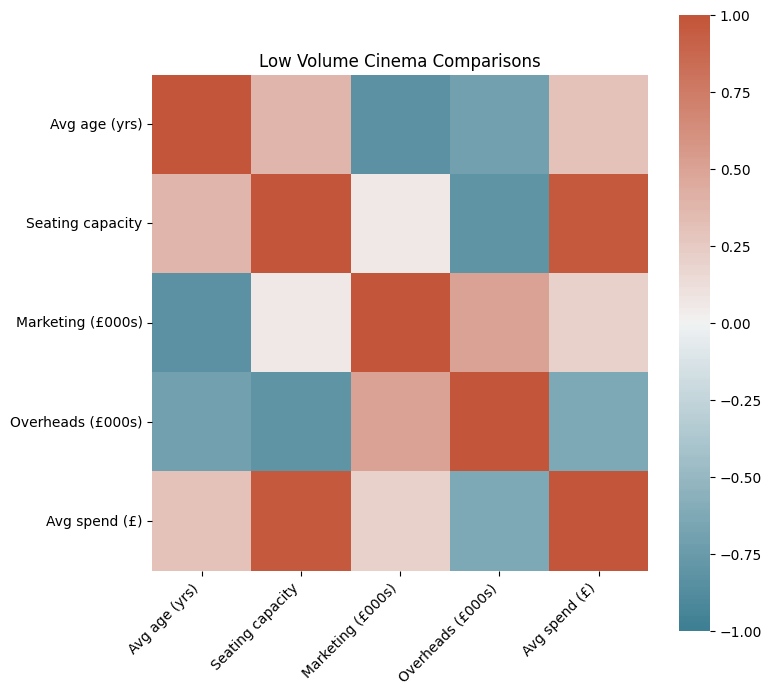

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the 'Id' column for the specified cinemas
cinemas = ['WQW', 'ACQ', 'XWO', 'XEZ']
filtered_data = summary_df[summary_df['Id'].isin(cinemas)].drop(columns=['Id'])

# Create a correlation matrix
corr = filtered_data.corr()

# Set up the plot
plt.figure(figsize=(8, 8))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True)

# Set labels and title
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
    horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title('Low Volume Cinema Comparisons')

# Show plot
plt.show()


# **VISUALISATION 9: TIME SERIES LINE PLOT ILLUSTRATING MEDIUM VOLUME CINEMAS VISITS OVER THE COURSE OF THREE YEARS.**


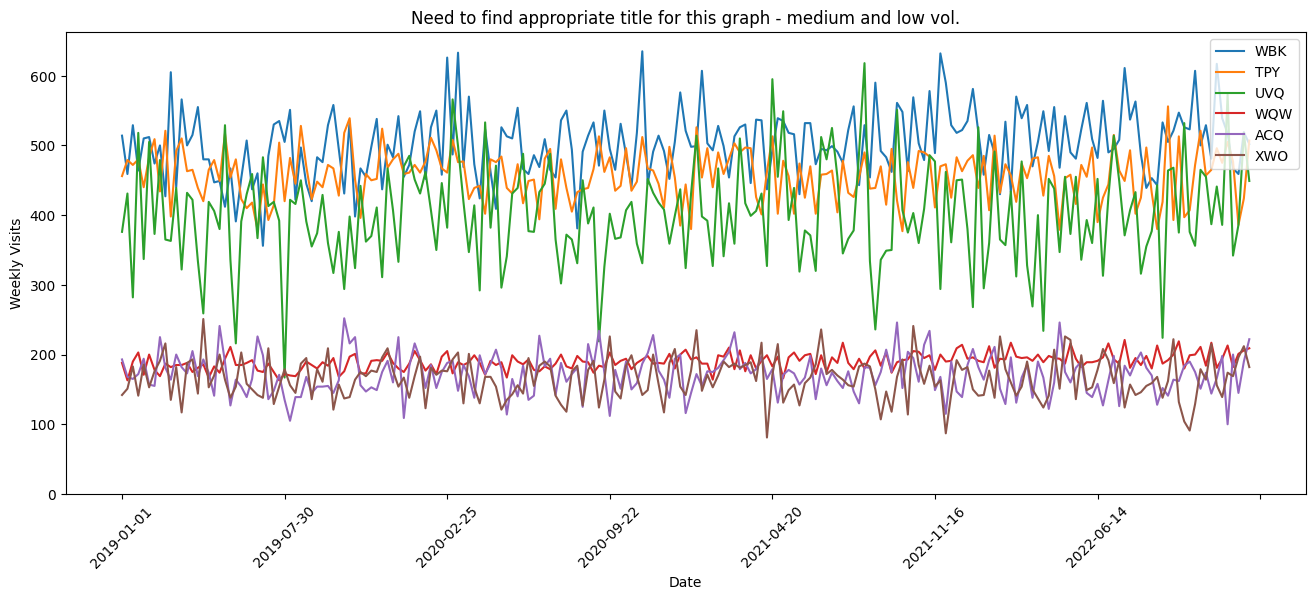

In [15]:
from matplotlib.ticker import MaxNLocator

# Define the selected IDs
selected_ids = ['WBK', 'TPY', 'UVQ', 'WQW', 'ACQ', 'XWO']

# Filter data for selected IDs
filtered_data = customer_data[customer_data['Id'].isin(selected_ids)]

# Set up the plot
plt.figure(figsize=(16, 6))

# Plot each selected ID's Total Weekly Visits
for id in selected_ids:
    id_data = filtered_data[filtered_data['Id'] == id]
    plt.plot(id_data['Date'], id_data['Weekly Visits'], label=id)

# Set the number of ticks on the x axis to 8
plt.gca().xaxis.set_major_locator(MaxNLocator(8))

# Changing y-axis to start from 0
plt.ylim(ymin=0)

# Set title and labels
plt.title('Need to find appropriate title for this graph - medium and low vol.')
plt.xlabel('Date')
plt.ylabel('Weekly Visits')

# Add legend to the right corner
plt.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

